# <center>DATA EXPLORATION</center>
***
## <font color = blue>I. DATA PREPARATION</font>
> A. LIBRARIES<br>
> B. DATA CLEANING<br>
> C. OVERALL VISUALIZATION<br>

## <font color = blue>II. DATA VISUALIZATION</font>
> A. FEATURES EXTRACTION<br>
> B. ANALYSIS BY ORIENTATION<br>
> C. ANALYSIS BY HEIGHT & WEIGHT<br>
> D. ANALYSIS BY CHANNEL<br>

## <font color = blue>III. CONCLUSION</font>

## <font color = blue>IV. DISPLAYING SAMPLES RANDOMLY</font>

## <font color = blue>V. SAVING THE DATAFRAME FOR NEXT STEPS</font>
***
##### Additional information before to get started :<br>
* Data exploration is an important step to understand the dataset we got in hand for further processing/analysis/predictions.
* We will have to take into account our observations, especially for computer vision classification approach.
***

## <font color = blue>I. DATA PREPARATION</font>
> A. LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline

from helpers import read_image

> B. DATA CLEANING

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/other_data.csv')
df = pd.read_csv('../data/other_data.csv')
df.head()


,filename,url,description,type,filepath,scraped,old_filename,old_filepath
0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg
1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg
2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg
3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg
4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg


In [3]:
# Delete the files of type rrc.cvc
indexNames = df[df['type'] == 'rrc.cvc'].index
df = df.drop(indexNames)

In [4]:
print('The dataset contains {} images.'.format(df.shape[0]))

The dataset contains 1308 images.


> C. OVERALL VISUALIZATION

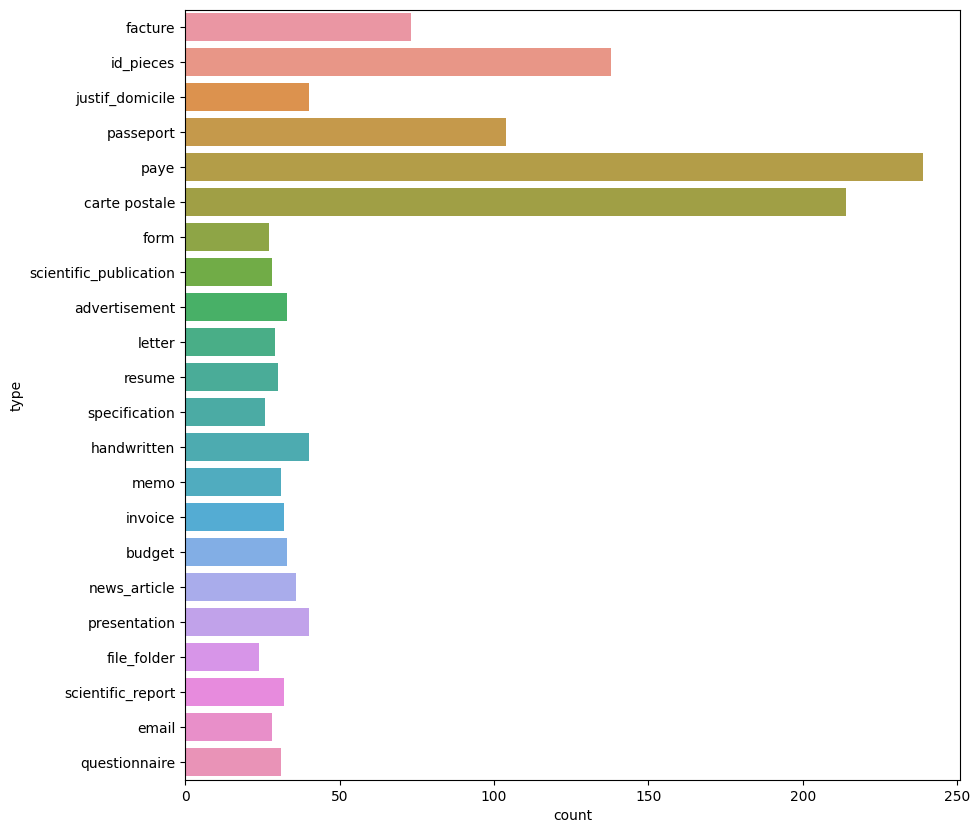

In [5]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y='type',data=df)
plt.show()

## <font color = blue>II. DATA VISUALIZATION</font>
> A. FEATURES EXTRACTION

Add image informations to the DataFrame :
* height
* width
* channels
* landscape

In [6]:
def get_image_shape(filename):
  try:
    im = read_image(filename)
    result = im.shape
  except:
    print('except',filename)
    result = (0,0,0)
  return result

i = 0
for index, row in df.iterrows():
    (height,width,channels) = get_image_shape(row['filename'])
    df.loc[index,'height'] = height
    df.loc[index,'width'] = width
    df.loc[index,'channels'] = channels
    df.loc[index,'landscape'] = 1 if width > height else 0 

df.head()

,filename,url,description,type,filepath,scraped,old_filename,old_filepath,height,width,channels,landscape
0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,1061.0,750.0,3.0,0.0
1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,1061.0,750.0,3.0,0.0
2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,1024.0,726.0,3.0,0.0
3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,1061.0,750.0,3.0,0.0
4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,771.0,773.0,3.0,1.0


> B. ANALYSIS BY ORIENTATION

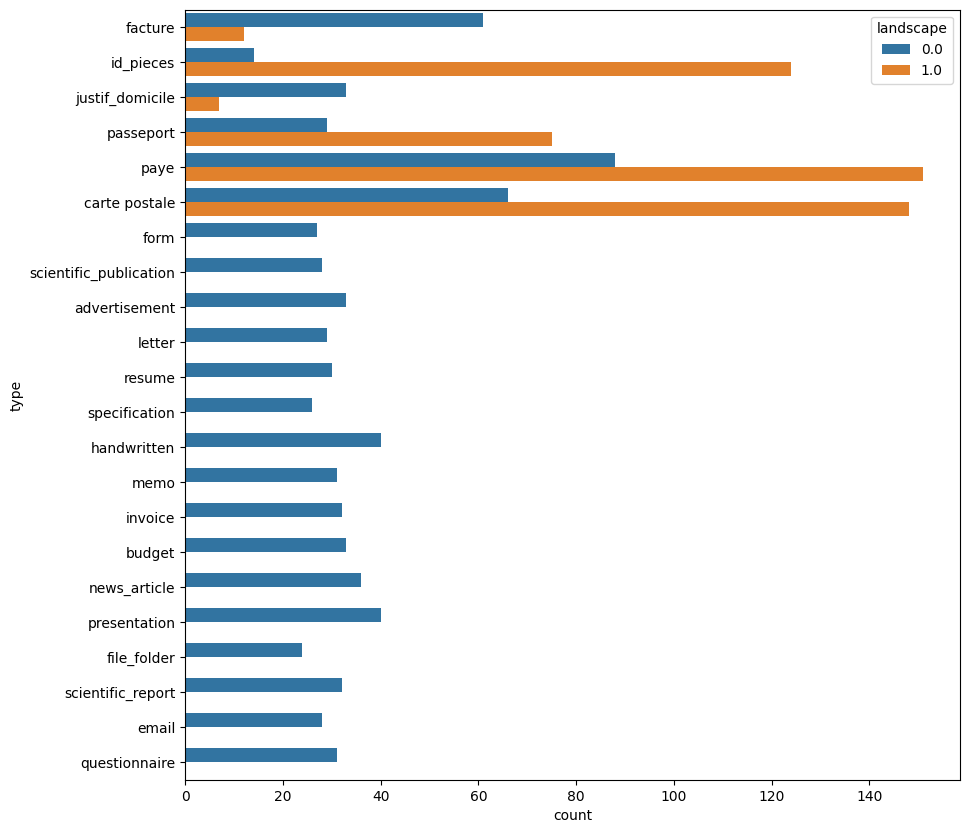

In [7]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y='type',hue='landscape',data=df)
plt.show()

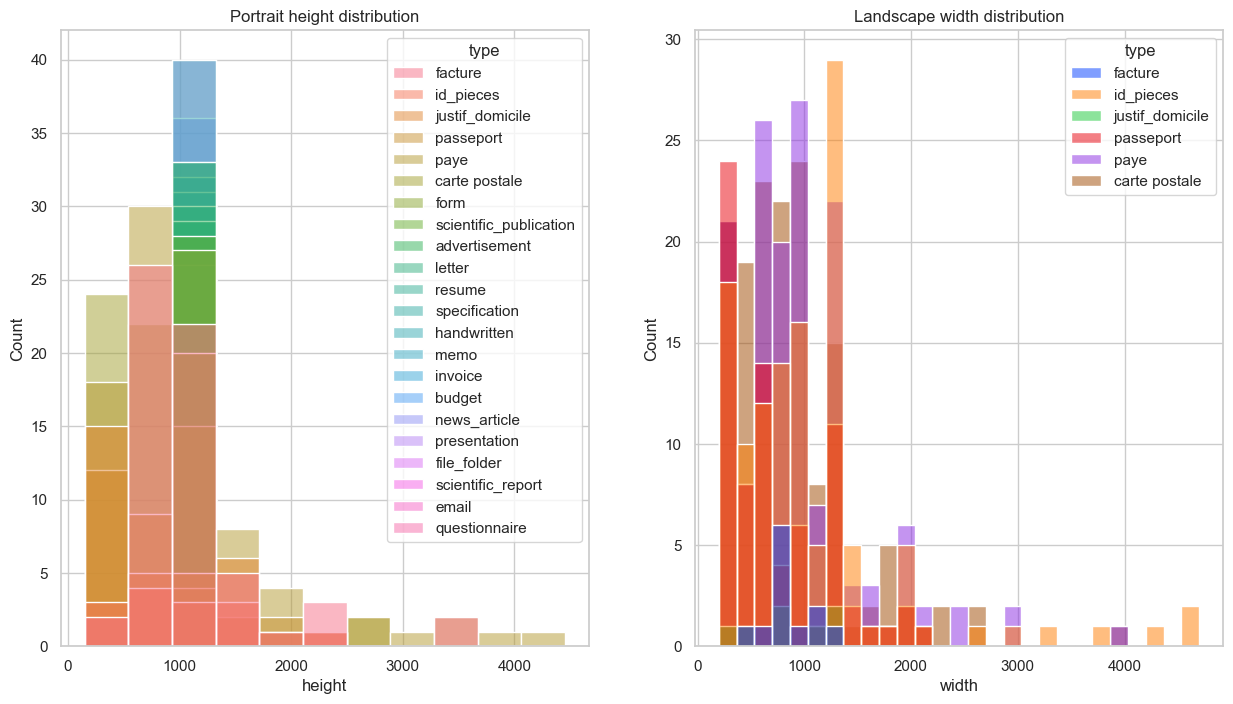

In [8]:
df_landscape = pd.DataFrame(df[df['landscape'] == 1])
df_portrait = pd.DataFrame(df[df['landscape'] == 0])

sns.set(style="whitegrid", palette="bright")

fig, axes = plt.subplots(1, 2, figsize = (15,8))

axes[0].set_title('Portrait height distribution')
sns.histplot(x = 'height', hue = 'type', data = df_portrait, ax = axes[0])

axes[1].set_title('Landscape width distribution')
sns.histplot(x = 'width', hue = 'type', data = df_landscape, ax = axes[1])
plt.show()

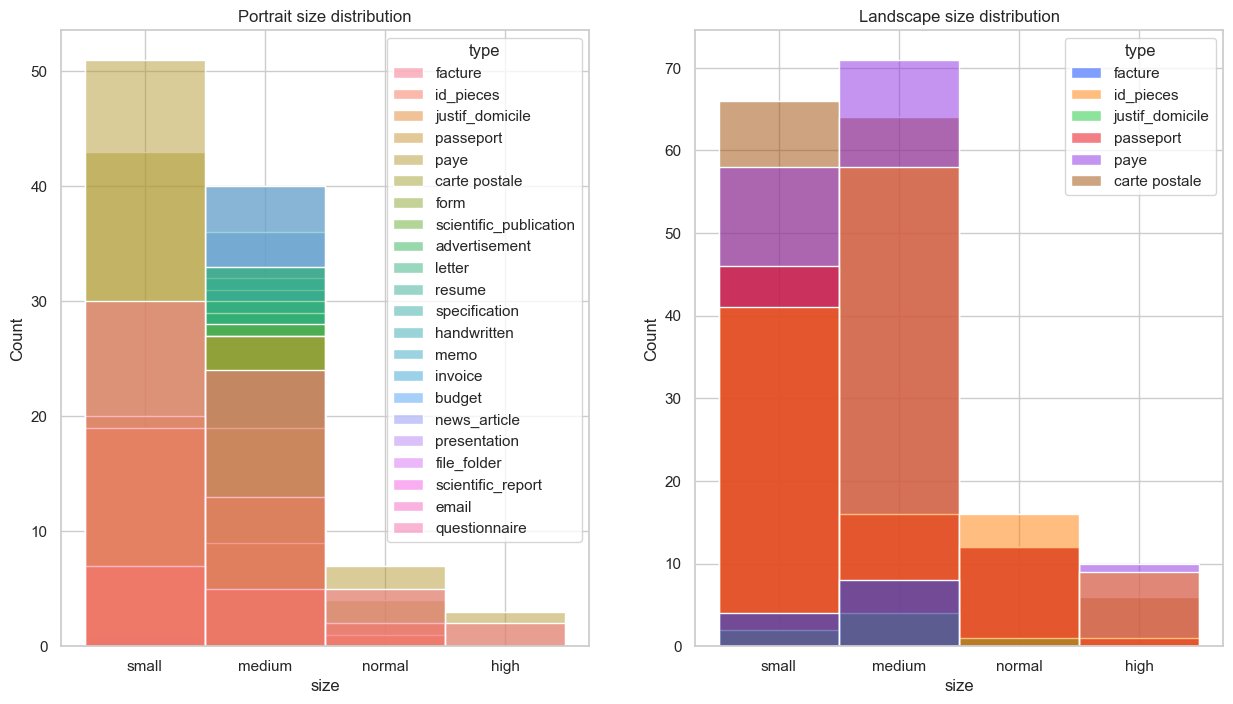

In [9]:
cut_bins = [0, 720, 1280, 1920, 100000]

df_landscape['size'] = pd.cut(df_landscape['width'], labels=['small', 'medium', 'normal', 'high'], bins=cut_bins)
df_portrait['size'] = pd.cut(df_portrait['width'], labels=['small', 'medium', 'normal', 'high'], bins=cut_bins)


fig, axes = plt.subplots(1, 2,figsize=(15,8))

axes[0].set_title('Portrait size distribution')
sns.histplot(x='size',hue='type',data=df_portrait,ax=axes[0])

axes[1].set_title('Landscape size distribution')
sns.histplot(x='size',hue='type',data=df_landscape,ax=axes[1])
plt.show()

> C. ANALYSIS BY HEIGHT & WEIGHT

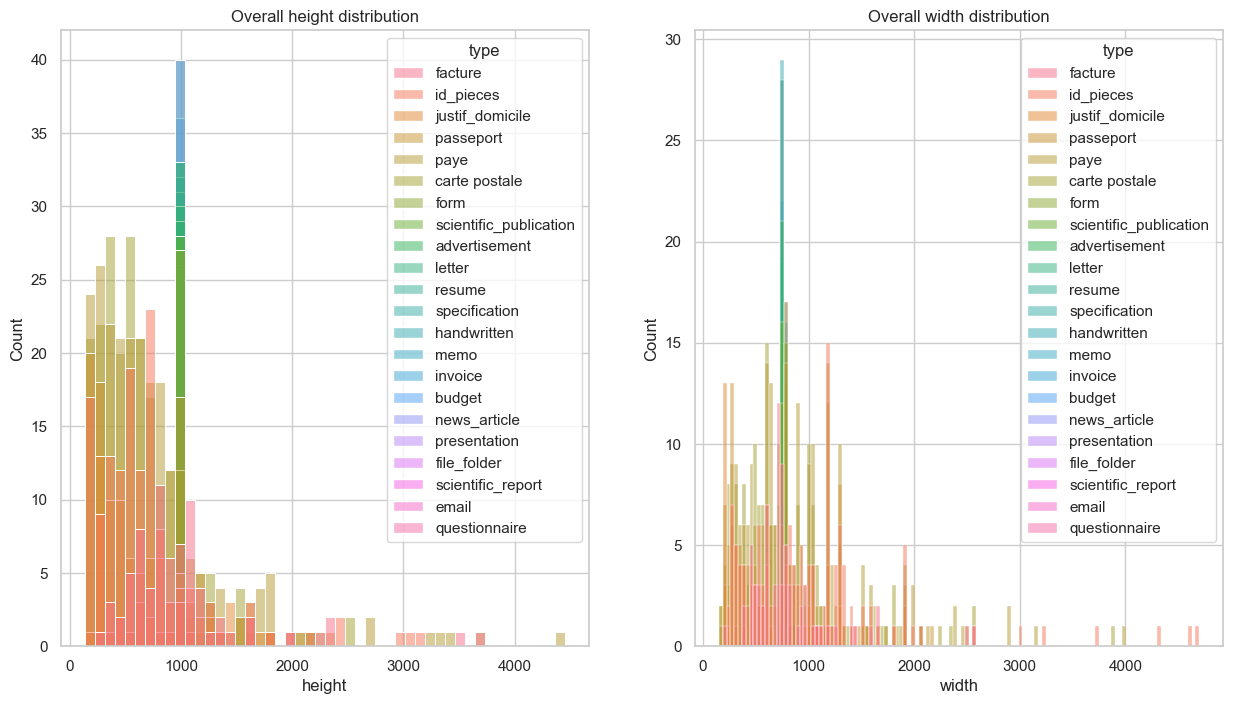

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
axes[0].set_title('Overall height distribution')
sns.histplot(x = 'height', hue = 'type', data = df, ax = axes[0])

axes[1].set_title('Overall width distribution')
sns.histplot(x = 'width', hue = 'type', data = df, ax = axes[1])
plt.show()

In [11]:
df[['height', 'width']].describe(percentiles = [0.026, 0.07, 0.1, 0.2])

,height,width
count,1308.000000,1308.000000
mean,822.093272,819.601682
std,446.387685,450.261632
min,133.000000,150.000000
2.6%,182.982000,223.982000
7%,225.000000,300.000000
10%,270.000000,362.000000
20%,421.800000,577.800000
50%,1000.000000,754.000000
max,4455.000000,4700.000000


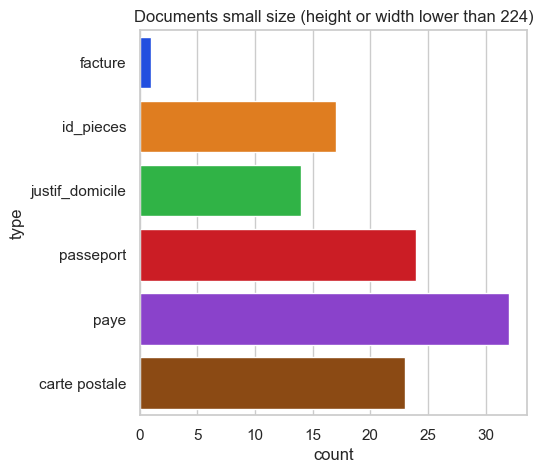

In [12]:
df_small = df[ (df.height < 224) | (df.width < 224) ]

fig = plt.figure(figsize = (5, 5))
plt.title('Documents small size (height or width lower than 224)')
sns.countplot(y = 'type', data = df_small)
plt.show()

> D. ANALYSIS BY CHANNEL

In [13]:
df.channels.describe()

count    1308.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: channels, dtype: float64

## <font color = blue>III. CONCLUSION</font>

The current data exploration leads us to the following observations :
* The dataset is a bit unbalance. Five types are more represented: salary slip, postcard, id card, passport, bill.
* Some documents may have a different orientation (especially salary slip, postcard, id card, passport).
* All documents are in color (3 channels).
* 7% of documents got a height lower than 224 and 2.6% a width lower than 224.

For computer vision approach it will be better to select algorithms with a resolution of 224 x 224 x 3 and take into account the other parameters.

## <font color = blue>IV. DISPLAYING SAMPLES RANDOMLY</font>

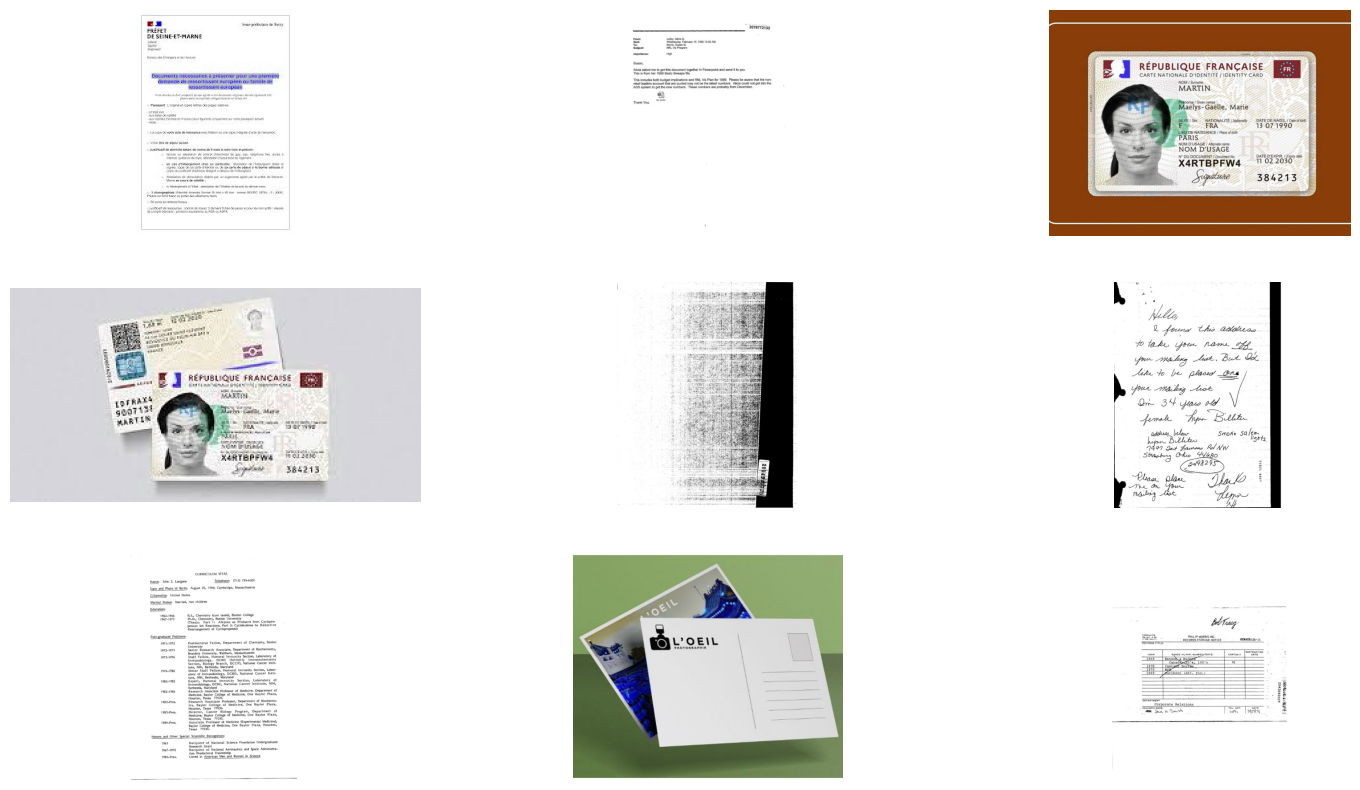

In [14]:
j = 1
plt.figure(figsize = (18, 10))
for i in np.random.choice(df.index, size = 9):
    plt.subplot(3, 3, j)
    plt.axis('off')
    plt.imshow(read_image(df.filename[i]))
    j += 1

## <font color = blue>V. SAVING THE DATAFRAME FOR NEXT STEPS</font>

In [ ]:
df.to_csv('../data/data_with_meta.csv')